In [46]:
#import supporting files 
%run helper_functions.py
%run grid.py
%run Graph.py 

In [47]:
import math 
import random 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

import time 
import pandas as pd 
from random import seed 
from random import randint 


np.random.seed(45)

### Overview of design of heuristic algorithm


My strategy in designing a heuristic to find the shortest path from the source (top-left) to the destination (bottom-right) was to initially look for the local minimum in all cells adjacent to the agent’s cell and travel along that path to reach the destination excluding any already visited cell. However, there were issues encountered with this approach such as the agent backing itself into a corner. On implementing back-tracking (i.e., allowing an agent to go back to a visited cell and pick the second lowest), this solution also performed poorly both in terms of execution time as well as total path cost to reach the destination. <br><br> Ultimately the heuristic algorithm implemented was to find the cell adjacent that was either to the bottom or right and to choose the cell with lower cost. This was the baseline model against which Dijkstra’s was evaluated. 



## Game Mode 1 

In [49]:
#set up parameters 
dims = np.concatenate( (np.arange(5,51,5), np.arange(60,101,10)))
MAX_COST = 100
mode = 1

In [50]:
results_df = pd.DataFrame(columns=['board_size', 'd_exec_time', 'd_cost','g_exec_time', 'g_cost'])

for i in dims:
    start = time.time()
    for j in range(0,3):
        #print("Board size {} x {}".format(i,i), "iteration {}".format(j+1))
        costGrid = np.random.randint(0, MAX_COST, (i, i))
        myBoard = Grid(i, i, costGrid)

        #dijkstra 
        time_start = time.time()
        d_path, d_cost = getShortestPath("dijkstras", mode, costGrid, myBoard)
        d_exec_time = time.time() - time_start
        d_pathlen = len(d_path)
 

        #greedy 
        time_start = time.time()
        g_path, g_cost = getShortestPath("greedy", mode, costGrid, myBoard)
        g_exec_time = time.time() - time_start
        g_pathlen = len(g_path)
        #print(g_path)


        new_result = {'board_size': i, 
                      'd_exec_time': d_exec_time, 'd_cost': d_cost,
                      'g_exec_time': g_exec_time, 'g_cost': g_cost}

        results_df = results_df.append(new_result, ignore_index = True)
    print("Board size {} x {}".format(i,i), "total time: {}".format(time.time()-start))

    
    

Board size 5 x 5 total time: 0.015987873077392578
Board size 10 x 10 total time: 0.057965755462646484
Board size 15 x 15 total time: 0.2088320255279541
Board size 20 x 20 total time: 0.681610107421875
Board size 25 x 25 total time: 1.621072769165039
Board size 30 x 30 total time: 3.257152795791626
Board size 35 x 35 total time: 6.3793253898620605
Board size 40 x 40 total time: 10.414052486419678
Board size 45 x 45 total time: 22.346179962158203
Board size 50 x 50 total time: 28.586649656295776
Board size 60 x 60 total time: 65.23961901664734
Board size 70 x 70 total time: 126.15372633934021
Board size 80 x 80 total time: 206.88247299194336
Board size 90 x 90 total time: 325.68247532844543
Board size 100 x 100 total time: 551.6764724254608


In [51]:
results_df['cost_perc'] = (1 - results_df['d_cost']/results_df['g_cost'])*100
results_df['time_perc'] = (results_df['g_exec_time']/results_df['d_exec_time'])*100

results_df.head()

,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,5.0,0.001001,226.0,0.000000,375.0,39.733333,0.000000
1,5.0,0.002998,264.0,0.000000,359.0,26.462396,0.000000
2,5.0,0.001999,302.0,0.000000,533.0,43.339587,0.000000
3,10.0,0.024988,674.0,0.000999,782.0,13.810742,3.996832
4,10.0,0.010993,625.0,0.000000,823.0,24.058323,0.000000


In [52]:
results_df.describe()

,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,45.000000,29.977706,2341.466667,0.002064,3048.711111,23.718985,0.198335
std,28.900299,51.798319,1448.457324,0.002551,1864.477305,6.194972,0.656798
min,5.000000,0.001001,226.000000,0.000000,359.000000,13.810742,0.000000
25%,20.000000,0.251849,1132.000000,0.000998,1511.000000,19.916580,0.004177
50%,40.000000,3.472031,2073.000000,0.001000,2782.000000,23.195318,0.009548
75%,70.000000,40.180971,3543.000000,0.002001,4542.000000,27.776526,0.086212
max,100.000000,187.256715,5264.000000,0.013992,6767.000000,43.339587,3.996832


In [54]:
avg_results = results_df.groupby('board_size').mean()
avg_results.reset_index().head()

,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,5.0,0.001999,264.000000,0.000000,422.333333,36.511772,0.000000
1,10.0,0.015991,620.333333,0.000333,784.333333,20.911792,1.332277
2,15.0,0.067278,828.666667,0.000667,1052.333333,20.873084,0.974027
3,20.0,0.224204,1130.666667,0.000666,1516.666667,25.342319,0.290977
4,25.0,0.537691,1370.333333,0.000666,1687.000000,19.082833,0.127424


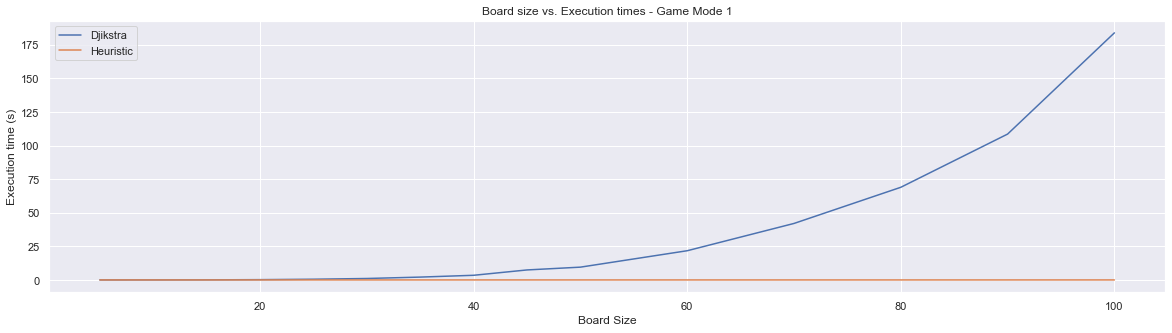

In [55]:
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
ax= sns.lineplot(x='board_size', y='d_exec_time', data=avg_results)
ax1 = sns.lineplot(x='board_size', y='g_exec_time', data=avg_results)
ax.legend(['Djikstra', "Heuristic"])
plt.xlabel("Board Size")
plt.ylabel("Execution time (s)")
plt.title("Board size vs. Execution times - Game Mode 1")
None

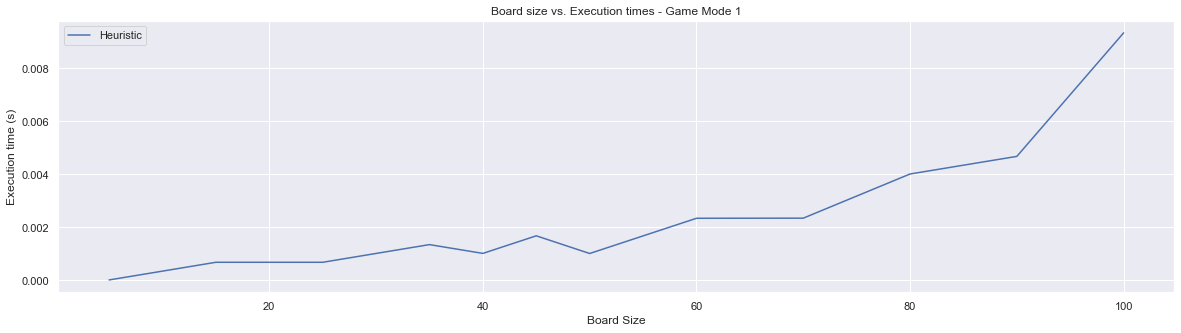

In [57]:
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
#ax= sns.lineplot(x='board_size', y='d_exec_time', data=avg_results)
ax1 = sns.lineplot(x='board_size', y='g_exec_time', data=avg_results)
ax.legend([ "Heuristic"])
plt.xlabel("Board Size")
plt.ylabel("Execution time (s)")
plt.title("Board size vs. Execution times - Game Mode 1")
None

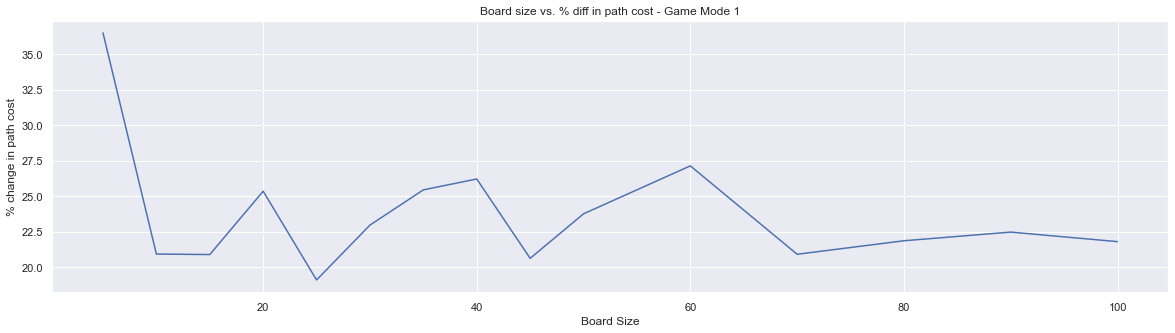

In [58]:
#board size vs avg path length 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
ax= sns.lineplot(x='board_size', y='cost_perc', data=avg_results)
plt.xlabel("Board Size")
plt.ylabel("% change in path cost")
plt.title("Board size vs. % diff in path cost - Game Mode 1")
None

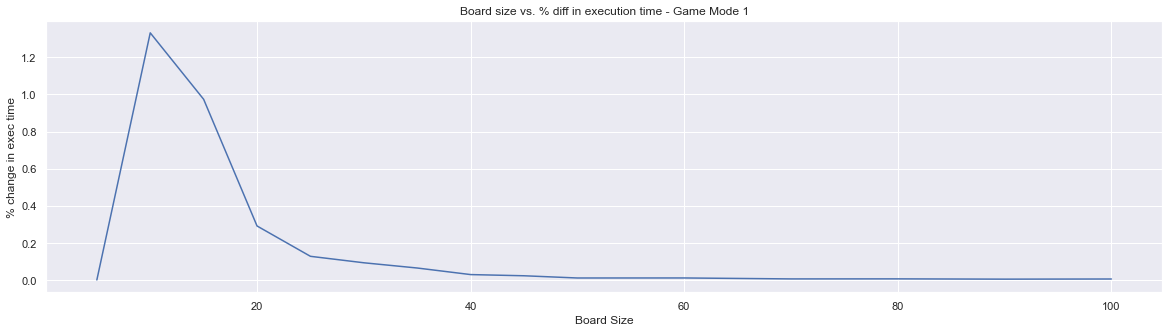

In [59]:
#board size vs avg path length 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
ax= sns.lineplot(x='board_size', y='time_perc', data=avg_results)
plt.xlabel("Board Size")
plt.ylabel("% change in exec time")
plt.title("Board size vs. % diff in execution time - Game Mode 1")
None

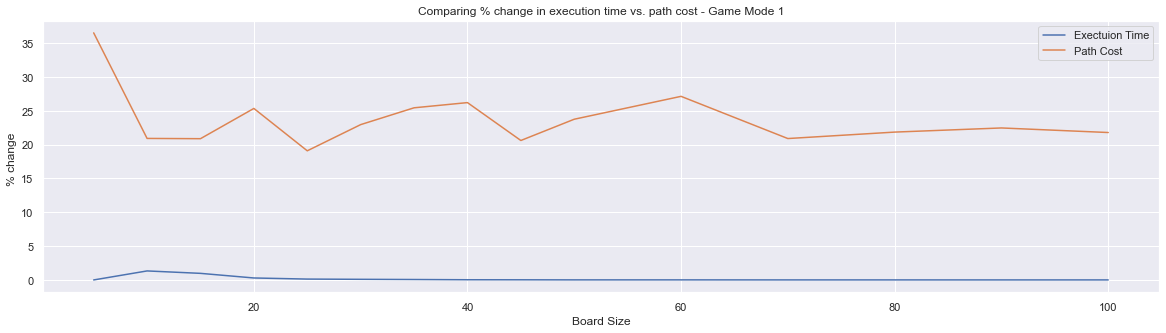

In [60]:
#board size vs avg path length 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
ax= sns.lineplot(x='board_size', y='time_perc', data=avg_results)
ax1= sns.lineplot(x='board_size', y='cost_perc', data=avg_results)
ax.legend(['Exectuion Time', "Path Cost"])

plt.xlabel("Board Size")
plt.ylabel("% change ")
plt.title("Comparing % change in execution time vs. path cost - Game Mode 1")
None

## Game Mode 2 

In [61]:
#set up parameters 
dims = np.concatenate( (np.arange(5,51,5), np.arange(60,101,10)))
MAX_COST = 100
mode = 2

In [62]:
results_df2 = pd.DataFrame(columns=['board_size', 'd_exec_time', 'd_cost','g_exec_time', 'g_cost'])

for i in dims:
    start = time.time()
    for j in range(0,3):
        #print("Board size {} x {}".format(i,i), "iteration {}".format(j+1))
        costGrid = np.random.randint(0, MAX_COST, (i, i))
        myBoard = Grid(i, i, costGrid)

        #dijkstra 
        time_start = time.time()
        d_path, d_cost = getShortestPath("dijkstras", mode, costGrid, myBoard)
        d_exec_time = time.time() - time_start
        d_pathlen = len(d_path)
 

        #greedy 
        time_start = time.time()
        g_path, g_cost = getShortestPath("greedy", mode, costGrid, myBoard)
        g_exec_time = time.time() - time_start
        g_pathlen = len(g_path)
        #print(g_path)


        new_result = {'board_size': i, 
                      'd_exec_time': d_exec_time, 'd_cost': d_cost,
                      'g_exec_time': g_exec_time, 'g_cost': g_cost}

        results_df2 = results_df2.append(new_result, ignore_index = True)
    print("Board size {} x {}".format(i,i), "total time: {}".format(time.time()-start))



Board size 5 x 5 total time: 0.013992071151733398
Board size 10 x 10 total time: 0.054030418395996094
Board size 15 x 15 total time: 0.21184372901916504
Board size 20 x 20 total time: 1.2482914924621582
Board size 25 x 25 total time: 2.006326675415039
Board size 30 x 30 total time: 4.0128185749053955
Board size 35 x 35 total time: 8.659584999084473
Board size 40 x 40 total time: 14.291220664978027
Board size 45 x 45 total time: 22.061044692993164
Board size 50 x 50 total time: 41.06387519836426
Board size 60 x 60 total time: 80.15710544586182
Board size 70 x 70 total time: 134.36895656585693
Board size 80 x 80 total time: 228.14637923240662
Board size 90 x 90 total time: 348.27306151390076
Board size 100 x 100 total time: 497.93877601623535


In [65]:
results_df2['cost_perc'] = (1 - results_df2['d_cost']/results_df2['g_cost'])*100
results_df2['time_perc'] = (results_df2['g_exec_time']/results_df2['d_exec_time'])*100

results_df2.head()

,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,5.0,0.001004,159.0,0.0,509.0,68.762279,0.0
1,5.0,0.000997,119.0,0.0,488.0,75.614754,0.0
2,5.0,0.000978,107.0,0.0,519.0,79.383430,0.0
3,10.0,0.019033,199.0,0.0,762.0,73.884514,0.0
4,10.0,0.012992,295.0,0.0,1081.0,72.710453,0.0


In [66]:
results_df2.describe()

,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,45.000000,30.717054,1263.400000,0.002157,4429.177778,70.885695,0.064282
std,28.900299,49.359585,795.104607,0.002303,2883.132287,4.615508,0.222229
min,5.000000,0.000978,107.000000,0.000000,488.000000,51.832461,0.000000
25%,20.000000,0.632601,632.000000,0.000000,2043.000000,69.065100,0.000000
50%,40.000000,4.727193,1187.000000,0.001013,3760.000000,70.996641,0.006970
75%,70.000000,42.978072,1879.000000,0.002997,6546.000000,73.646724,0.020640
max,100.000000,177.492363,2849.000000,0.007992,9928.000000,79.383430,1.388613


In [67]:
avg_results2 = results_df2.groupby('board_size').mean()
avg_results2.reset_index().head()

,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,5.0,0.000993,128.333333,0.000000,505.333333,74.586821,0.000000
1,10.0,0.015336,287.333333,0.000000,869.000000,66.142476,0.000000
2,15.0,0.067953,410.333333,0.000333,1485.666667,71.772549,0.462871
3,20.0,0.412766,579.333333,0.000667,1934.666667,69.875082,0.197780
4,25.0,0.665451,779.666667,0.000333,2544.000000,69.269908,0.050819


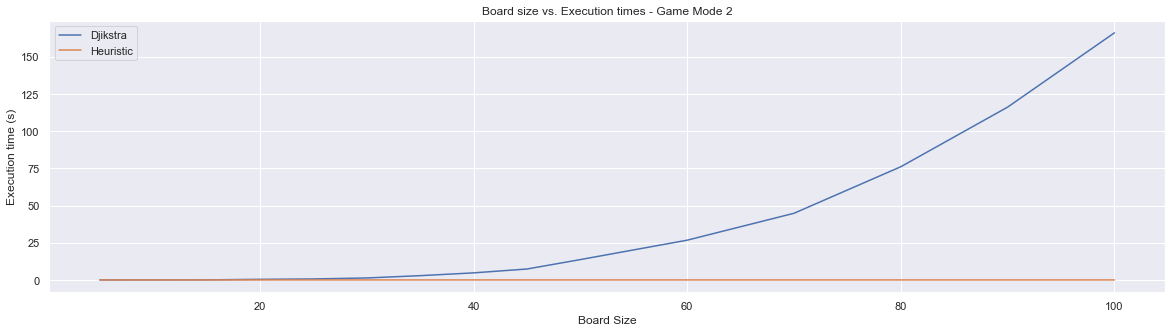

In [68]:
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
ax= sns.lineplot(x='board_size', y='d_exec_time', data=avg_results2)
ax1 = sns.lineplot(x='board_size', y='g_exec_time', data=avg_results2)
ax.legend(['Djikstra', "Heuristic"])
plt.xlabel("Board Size")
plt.ylabel("Execution time (s)")
plt.title("Board size vs. Execution times - Game Mode 2")
None

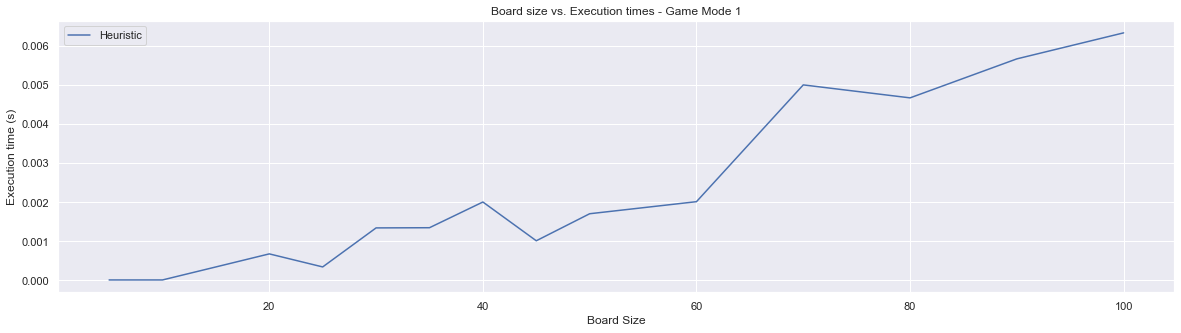

In [72]:
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
#ax= sns.lineplot(x='board_size', y='d_exec_time', data=avg_results)
ax1 = sns.lineplot(x='board_size', y='g_exec_time', data=avg_results2)
ax.legend([ "Heuristic"])
plt.xlabel("Board Size")
plt.ylabel("Execution time (s)")
plt.title("Board size vs. Execution times - Game Mode 1")
None

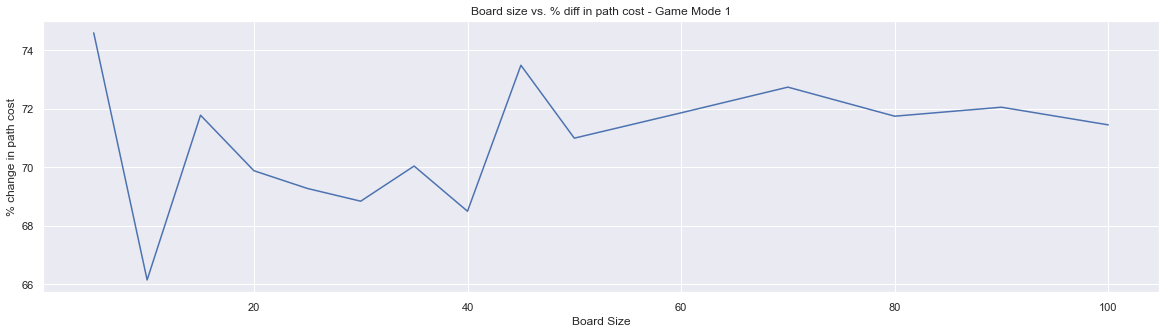

In [73]:
#board size vs avg path length 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
ax= sns.lineplot(x='board_size', y='cost_perc', data=avg_results2)
plt.xlabel("Board Size")
plt.ylabel("% change in path cost")
plt.title("Board size vs. % diff in path cost - Game Mode 2")
None

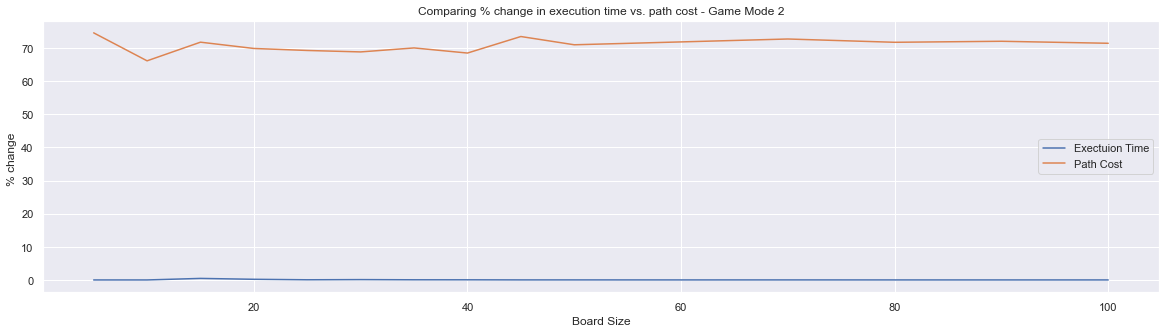

In [74]:
#board size vs avg path length 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
ax= sns.lineplot(x='board_size', y='time_perc', data=avg_results2)
ax1= sns.lineplot(x='board_size', y='cost_perc', data=avg_results2)
ax.legend(['Exectuion Time', "Path Cost"])

plt.xlabel("Board Size")
plt.ylabel("% change ")
plt.title("Comparing % change in execution time vs. path cost - Game Mode 2")
None

## Compare Game mode 1 vs Game mode 2 

### Djikstra's

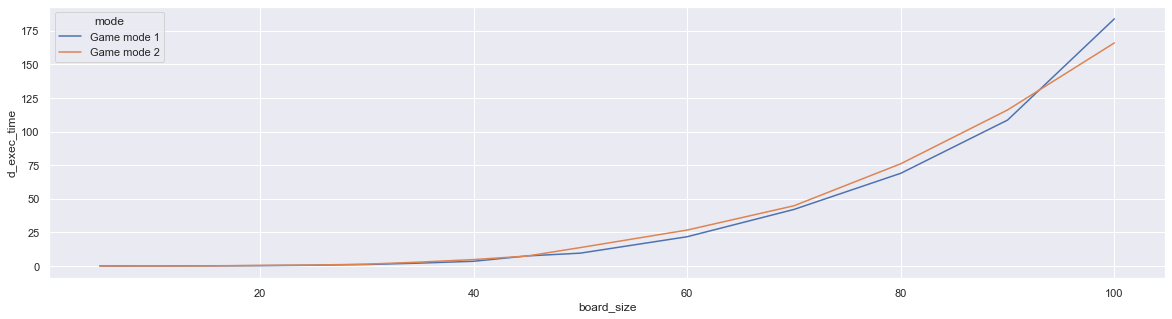

In [115]:
t1 = avg_results.reset_index()[['board_size', 'd_exec_time', 'd_cost']].copy()
t1['mode'] = 'Game mode 1'
t2 = avg_results2.reset_index()[['board_size', 'd_exec_time', 'd_cost']].copy()
t2['mode'] = 'Game mode 2'
results_d = pd.concat([t1,t2])
sns.lineplot(data=results_d, x="board_size", y="d_exec_time", hue="mode")
None

### Heuristic 

<AxesSubplot:xlabel='board_size', ylabel='g_exec_time'>

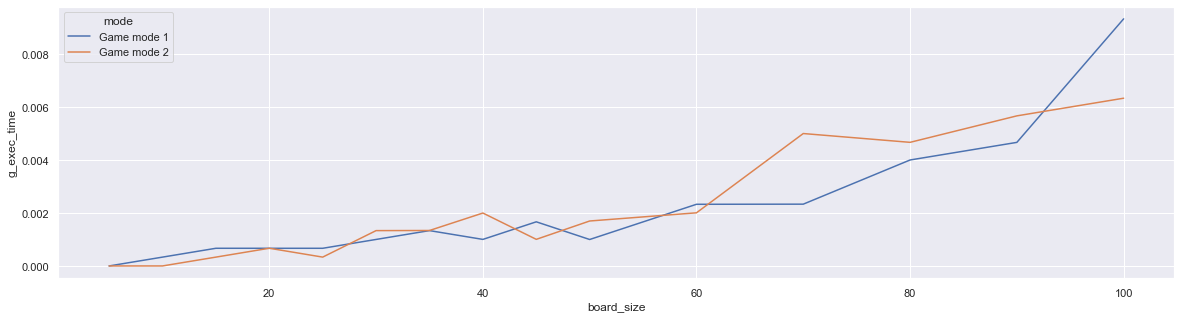

In [120]:
t1 = avg_results.reset_index()[['board_size', 'g_exec_time', 'g_cost', 'cost_perc']].copy()
t1['mode'] = 'Game mode 1'
t2 = avg_results2.reset_index()[['board_size', 'g_exec_time', 'g_cost', 'cost_perc']].copy()
t2['mode'] = 'Game mode 2'
results_d = pd.concat([t1,t2])
sns.lineplot(data=results_d, x="board_size", y="g_exec_time", hue="mode")


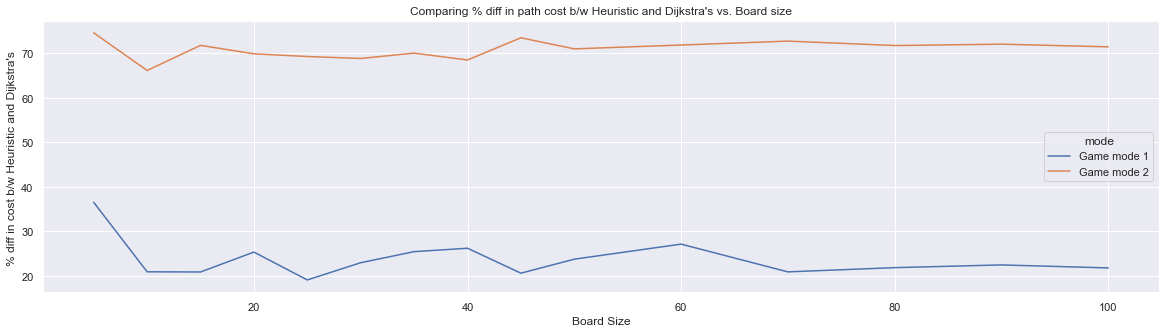

In [124]:
sns.lineplot(data=results_d, x="board_size", y="cost_perc", hue="mode")

plt.xlabel("Board Size")
plt.ylabel("% diff in cost b/w Heuristic and Dijkstra's ")
plt.title("Comparing % diff in path cost b/w Heuristic and Dijkstra's")
None

## Evaluating different distributions of cost 

### Game mode 1

In [226]:
#set up parameters 
board_dim = [10, 20, 30,  40, 50] 
COST = 1000
mode = 1
distributions = ["normal", "uniform", "binomial", "permutation"]

In [227]:
results_df3 = pd.DataFrame(columns=['distribution', 'board_size', 'd_exec_time', 'd_cost','g_exec_time', 'g_cost'])
#for each distribution
for dist in distributions:
    start = time.time()
    #for each board size 
    for j in range(0,len(board_dim)):
        #run for 3 iterations
        for k in range(0,3):
            if dist == "normal" : 
                costGrid = np.round(np.random.normal(COST, 30, (board_dim[j], board_dim[j]))).astype('int')
            elif dist == "uniform" :
                costGrid = np.round(np.random.uniform(0 , COST, (board_dim[j],board_dim[j]))).astype('int')
            elif dist == "binomial" :
                costGrid = np.random.binomial(COST, 0.5, (board_dim[j],board_dim[j]))
            elif dist == "permutation" :
                costGrid = np.random.binomial(COST, 0.5, (board_dim[j],board_dim[j]))         

            #print("distribution".format(dist), "iteration {}".format(j+1))
            myBoard = Grid(i, i, costGrid)

            #dijkstra 
            time_start = time.time()
            d_path, d_cost = getShortestPath("dijkstras", mode, costGrid, myBoard)
            d_exec_time = time.time() - time_start
            d_pathlen = len(d_path)


            #greedy 
            time_start = time.time()
            g_path, g_cost = getShortestPath("greedy", mode, costGrid, myBoard)
            g_exec_time = time.time() - time_start
            g_pathlen = len(g_path)
            #print(g_path)


            new_result = {'distribution': dist, 'board_size': str(board_dim[j])+'x'+str(board_dim[j]), 
                          'd_exec_time': d_exec_time, 'd_cost': d_cost,
                          'g_exec_time': g_exec_time, 'g_cost': g_cost}

            results_df3 = results_df3.append(new_result, ignore_index = True)
    print("{} distribution".format(dist), "total time: {}".format(time.time()-start))

normal distribution total time: 43.261391401290894
uniform distribution total time: 44.01878356933594
binomial distribution total time: 48.63513374328613
permutation distribution total time: 43.03050494194031


In [228]:
results_df3['cost_perc'] = (1 - results_df3['d_cost']/results_df3['g_cost'])*100
results_df3['time_perc'] = (results_df3['g_exec_time']/results_df3['d_exec_time'])*100

results_df3['d_cost'] = pd.to_numeric(results_df3['d_cost'])
results_df3['g_cost'] = pd.to_numeric(results_df3['g_cost'])
results_df3['cost_perc'] = pd.to_numeric(results_df3['cost_perc'])

results_df3.head()

,distribution,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,normal,10x10,0.020993,17725,0.0,18896,6.197079,0.0
1,normal,10x10,0.017005,17770,0.0,18838,5.669392,0.0
2,normal,10x10,0.016970,17646,0.0,18666,5.464481,0.0
3,normal,20x20,0.185893,37231,0.0,38271,2.717462,0.0
4,normal,20x20,0.181896,37236,0.0,38399,3.028725,0.0


In [229]:
avg_results3 = results_df3.groupby(['distribution', 'board_size']).mean().reset_index()#
avg_results3.head()

,distribution,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,binomial,10x10,0.033313,8797.000000,0.000667,9356.666667,5.980945,1.865926
1,binomial,20x20,0.612982,18624.333333,0.000666,19295.000000,3.475713,0.107002
2,binomial,30x30,1.477162,28350.333333,0.000334,29111.000000,2.612848,0.017101
3,binomial,40x40,4.135631,37935.333333,0.000999,38760.333333,2.128243,0.024728
4,binomial,50x50,9.905992,47852.000000,0.002331,48736.000000,1.812410,0.023537


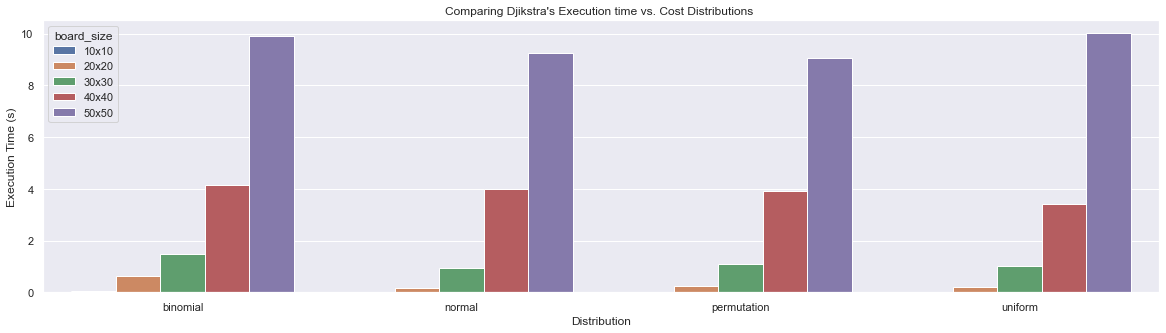

In [233]:
ax = sns.barplot(x="distribution", y="d_exec_time", hue="board_size", data=avg_results3)
plt.xlabel("Distribution")
plt.ylabel("Execution Time (s)")
plt.title("Comparing Djikstra's Execution time vs. Cost Distributions ")
None

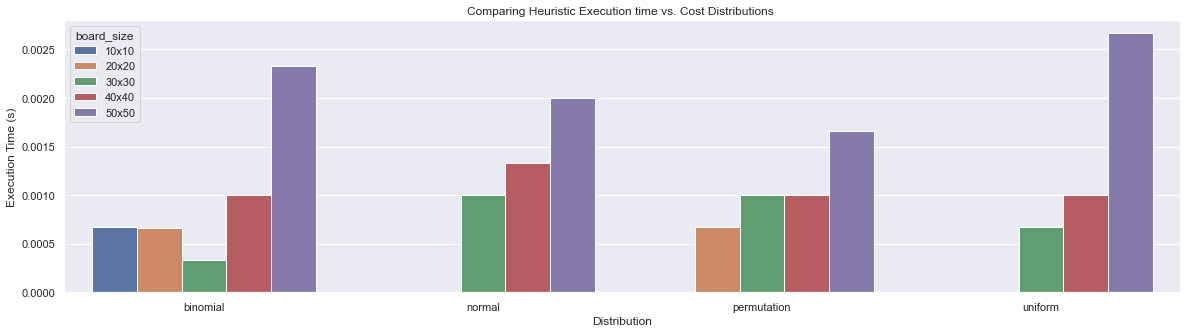

In [234]:
ax = sns.barplot(x="distribution", y="g_exec_time", hue="board_size", data=avg_results3)
plt.xlabel("Distribution")
plt.ylabel("Execution Time (s)")
plt.title("Comparing Heuristic Execution time vs. Cost Distributions ")
None

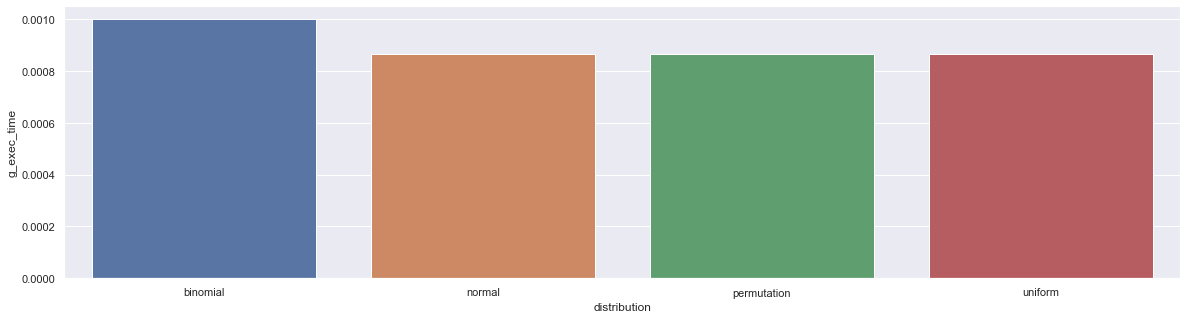

In [250]:
t1 = avg_results3.groupby('distribution').mean().reset_index()
ax = sns.barplot(x="distribution", y="g_exec_time", data=t1)

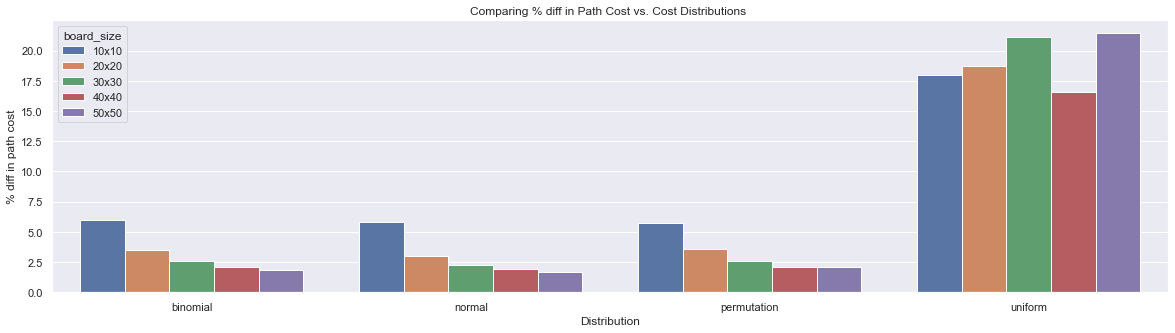

In [236]:
ax = sns.barplot(x="distribution", y="cost_perc", hue="board_size", data=avg_results3)
plt.xlabel("Distribution")
plt.ylabel("% diff in path cost")
plt.title("Comparing % diff in Path Cost vs. Cost Distributions ")
None

### Game mode 2

In [238]:
#set up parameters 
board_dim = [10, 20, 30,  40, 50] 
COST = 1000
mode = 2
distributions = ["normal", "uniform", "binomial", "permutation"]

In [239]:
results_df4 = pd.DataFrame(columns=['distribution', 'board_size', 'd_exec_time', 'd_cost','g_exec_time', 'g_cost'])
#for each distribution
for dist in distributions:
    start = time.time()
    #for each board size 
    for j in range(0,len(board_dim)):
        #run for 3 iterations
        for k in range(0,3):
            if dist == "normal" : 
                costGrid = np.round(np.random.normal(COST, 30, (board_dim[j], board_dim[j]))).astype('int')
            elif dist == "uniform" :
                costGrid = np.round(np.random.uniform(0 , COST, (board_dim[j],board_dim[j]))).astype('int')
            elif dist == "binomial" :
                costGrid = np.random.binomial(COST, 0.5, (board_dim[j],board_dim[j]))
            elif dist == "permutation" :
                costGrid = np.random.binomial(COST, 0.5, (board_dim[j],board_dim[j]))         

            #print("distribution".format(dist), "iteration {}".format(j+1))
            myBoard = Grid(i, i, costGrid)

            #dijkstra 
            time_start = time.time()
            d_path, d_cost = getShortestPath("dijkstras", mode, costGrid, myBoard)
            d_exec_time = time.time() - time_start
            d_pathlen = len(d_path)


            #greedy 
            time_start = time.time()
            g_path, g_cost = getShortestPath("greedy", mode, costGrid, myBoard)
            g_exec_time = time.time() - time_start
            g_pathlen = len(g_path)
            #print(g_path)


            new_result = {'distribution': dist, 'board_size': str(board_dim[j])+'x'+str(board_dim[j]), 
                          'd_exec_time': d_exec_time, 'd_cost': d_cost,
                          'g_exec_time': g_exec_time, 'g_cost': g_cost}

            results_df4 = results_df4.append(new_result, ignore_index = True)
    print("{} distribution".format(dist), "total time: {}".format(time.time()-start))

normal distribution total time: 47.28912949562073
uniform distribution total time: 46.340431213378906
binomial distribution total time: 47.24193263053894
permutation distribution total time: 48.980940103530884


In [240]:
results_df4['cost_perc'] = (1 - results_df4['d_cost']/results_df4['g_cost'])*100
results_df4['time_perc'] = (results_df4['g_exec_time']/results_df4['d_exec_time'])*100

results_df4['d_cost'] = pd.to_numeric(results_df4['d_cost'])
results_df4['g_cost'] = pd.to_numeric(results_df4['g_cost'])
results_df4['cost_perc'] = pd.to_numeric(results_df4['cost_perc'])

results_df4.head()

,distribution,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,normal,10x10,0.013988,328,0.000000,18899,98.264458,0.000000
1,normal,10x10,0.018989,322,0.000000,18796,98.286870,0.000000
2,normal,10x10,0.030981,299,0.002998,19040,98.429622,9.678164
3,normal,20x20,0.278862,539,0.001000,39177,98.624193,0.358489
4,normal,20x20,0.188891,614,0.000000,38598,98.409244,0.000000


In [242]:
avg_results4 = results_df4.groupby(['distribution', 'board_size']).mean().reset_index()#
avg_results4.head()

,distribution,board_size,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,binomial,10x10,0.012990,160.000000,0.000334,9531.000000,98.321406,2.782362
1,binomial,20x20,0.214210,255.333333,0.000000,19443.666667,98.685784,0.000000
2,binomial,30x30,1.084711,431.000000,0.000334,29523.000000,98.540177,0.031191
3,binomial,40x40,3.778501,536.000000,0.001332,39545.000000,98.644631,0.035652
4,binomial,50x50,10.622908,662.333333,0.002329,49540.666667,98.663137,0.021959


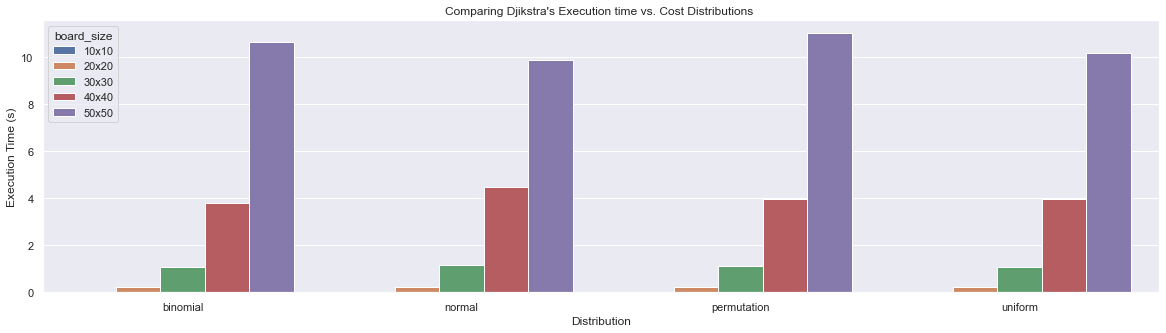

In [243]:
ax = sns.barplot(x="distribution", y="d_exec_time", hue="board_size", data=avg_results4)
plt.xlabel("Distribution")
plt.ylabel("Execution Time (s)")
plt.title("Comparing Djikstra's Execution time vs. Cost Distributions ")
None

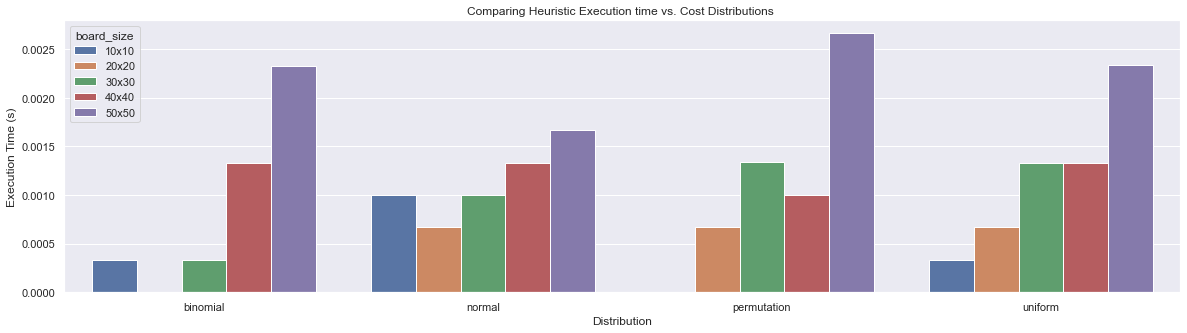

In [244]:
ax = sns.barplot(x="distribution", y="g_exec_time", hue="board_size", data=avg_results4)
plt.xlabel("Distribution")
plt.ylabel("Execution Time (s)")
plt.title("Comparing Heuristic Execution time vs. Cost Distributions ")
None

In [251]:
t1 = avg_results4.groupby('distribution').mean().reset_index()
#ax = sns.barplot(x="distribution", y="g_exec_time", data=t1)
t1

,distribution,d_exec_time,d_cost,g_exec_time,g_cost,cost_perc,time_perc
0,binomial,3.142664,408.933333,0.000866,29516.666667,98.571027,0.574233
1,normal,3.145147,790.733333,0.001132,58959.866667,98.591311,0.727034
2,permutation,3.258731,421.066667,0.001132,29534.266667,98.527756,0.091901
3,uniform,3.082632,8438.866667,0.001200,29132.200000,69.963479,0.711799


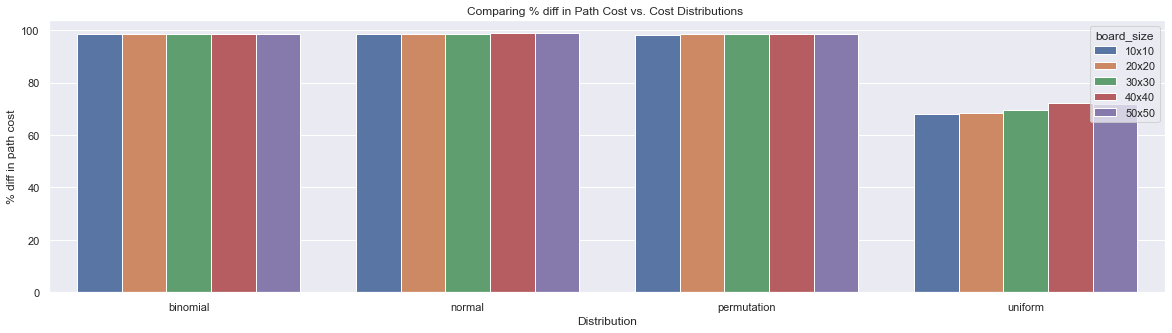

In [246]:
ax = sns.barplot(x="distribution", y="cost_perc", hue="board_size", data=avg_results4)
plt.xlabel("Distribution")
plt.ylabel("% diff in path cost")
plt.title("Comparing % diff in Path Cost vs. Cost Distributions ")
None